# Homework 1

### 1. Assume we implemented an algorithm that has complexity approximately $n log(n)$. How much faster is this implementation compared to one of complexity $n^2$?

So as we know at the moment that we run de code with an algorithm $nlog(n)$ the first iteration like 1 to 10 will be kind of the same to the $n^2$ algorithm, but if we use numbers like 1 to 1000 the execution time will be enormously different because the operation has to make more iterations making the system more slow
Also if we want to know the execution time we can use the function $nlog(n)$, let's asume that $n = 1000$. 
$1000 \cdot log(1000) = 3000$, now if we use the $n^2$ algorithm we will see the change
$1000^2 = 1000000$, as we expected $3000$ and $1000000$ are enormously different and with this we know that the $nlog(n)$ its a better algorithm if we want to implement in our systems

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

r = pd.DataFrame()
r["n"] = np.arange(1,100,10)
r["n1"] = np.arange(1,100,10) #Creating ranges

In [3]:
r['log(n)'] = np.log2(r['n'])
r['n^2'] = np.power(r['n'],2) #Creating the function to show

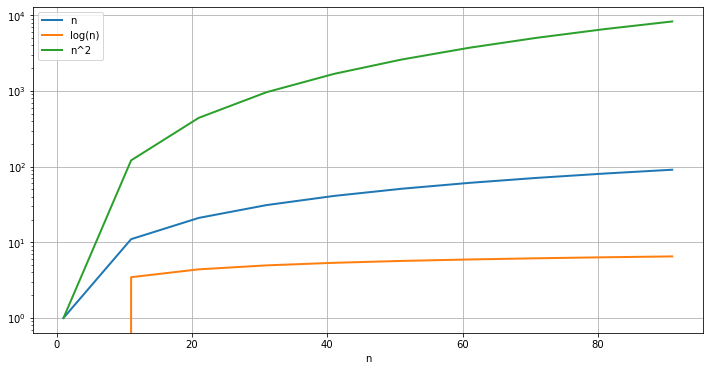

In [4]:
r.plot(x='n1', logy=True, lw=2, figsize=(12,6))
plt.xlabel('n') #Plotting the figure
plt.grid()

### 2. The runtime of an algorithm is captured in the following table:

As precissely as possible, estimate the function that describes the growth of the runtime 

|$n$  | runtime -- $T(n)$|
|---- | ----- |
|1000|0.0|
|2000|0.02|
|4000|0.2|
|8000|0.6|
|16000|2.6|
|32000|10.4|
|64000|41.6|

[1000, 2000, 4000, 8000, 16000, 32000, 64000] [0.02, 0.04, 0.08, 0.16, 0.32, 0.64, 1.28]
-----------
[1000, 2000, 4000, 8000, 16000, 32000, 64000] [0.0, 0.002, 0.2, 0.6, 2.6, 10.4, 41.6]


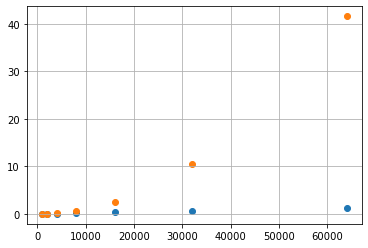

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

n = 500
arr = []
arr2 = []

n2 = [1000,2000,4000,8000,16000,32000,64000]
t_n2 = [0.0,0.002,0.2,0.6,2.6,10.4,41.6]

for i in range(1,8,1):
    n = n * 2
    arr.append(n)  # Creating the n variables and storing them in arrays
    t_n = n*10000  # Fuction that describes the growth of the runtime
    arr2.append(t_n)


#plt.plot(arr, arr2)
print(arr, arr2)
print("-----------")
print(n2, t_n2)
plt.scatter(arr, arr2)
plt.scatter(n2, t_n2)
plt.grid()
plt.show()

The funtion has the form $T(n) = a \cdot b^x$

### 3. By estimating the number of operations as a function of $n$, estimate the complexity of the following function

```
def func1(n):
    A = range(0,n)
    sum = 0
    i = 0
    for x in A[i:]:
        i += 1
        for j in range(i, len(A)):
            y = A[j]
            k = j
            while k < len(A):
                z = A[k]
                k = 2*k
                if x + y <= z:
                    sum += 1
    return sum
```

<img src="1.png">

### 4. From class, remember the code we use to get the sum of the first $n$ positive integers:

```
def sum1(n):
    total = 0
    for i in range(1, n+1):
        total += i
    return total
```

Now consider a different function that does the same thing.

```
def sum2(n): 
    total = n*(n+1)//2
    return total
```

1. Run the two functions and make sure that they return the same outputs. Use $n = 5, 8, 103, 527$
2. Use Python time library to estimate the runtime for inputs of $n = [1, 10, 10^2, 10^3, 10^4, 10^5, 10^6, 10^7, 10^8, 10^9]$
3. Plot the runtime as a function of $n$ for both functions in the same figure. 
    - Use different line colors and markers to help distinguish between the two curves. 
4. Analytically estime the runtime functions for the functions `sum1` and `sum2`. Call them $T_1(n)$ and $T_2(n)$.
    - Note that the times obtained in your computer will be different to the ones shown in class since the speed and memory of the computers used to run the code are likely different
5. How long will it take to run the code for $n = 10^{100}$ using `sum1` and `sum2`? What are your main impressions about the difference?

**Hint:** Use and modify the code from the slides to get and plot the runtime


1. Run the two functions and make sure that they return the same outputs. Use $n = 5, 8, 103, 527$

In [5]:
def sum1(n):
    total = 0
    for i in range(1, n+1):
        total += i
    return total

def sum2(n): 
    total = n*(n+1)//2
    return total

n = [5, 8, 103, 527]

In [6]:
for i in n:
    print("Function sum1 = ", sum1(i))
    print("Function sum2 = ", sum2(i))

Function sum1 =  15
Function sum2 =  15
Function sum1 =  36
Function sum2 =  36
Function sum1 =  5356
Function sum2 =  5356
Function sum1 =  139128
Function sum2 =  139128


2. Use Python time library to estimate the runtime for inputs of $n = [1, 10, 10^2, 10^3, 10^4, 10^5, 10^6, 10^7, 10^8, 10^9]$

In [104]:
from functools import wraps
import time

def timer(func):
    @wraps(func)
    def timer_wrapper(*args, **kwargs):
        start = time.perf_counter() ## time.perf_counter() gives the time in seconds
        result = func(*args, **kwargs)
        end = time.perf_counter()
        total_time = end - start
        print(f'Function {func.__name__}{args} {kwargs}, {total_time:.5f} seconds') ## Print the function and the time that it takes
        return result, total_time
    return timer_wrapper

@timer
def sum1(n):
    total = 0
    for i in range(1, n+1):
        total += i
    return total

@timer
def sum2(n): 
    total = n*(n+1)//2
    return total

In [105]:
import matplotlib.pyplot as plt

n1 = [1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000]
array1 = []   #Arrays that we use to store the vaules that return the functions sum1 and sum2 and also the time it took each one
array2 = []   
time_sum1 = [] #Arrays for store the times
time_sum2 = []
for j in n1:
    array1.append(sum1(j))
    array2.append(sum2(j))
print("array1 = ", array1)
print("array2 = ", array2)

for k in array1:
    time_sum1.append(k[1])
                            #Here we process the data and send to the arrays time_sum1 and time_sum2 to store only the times
for o in array2:
    time_sum2.append(o[1])

print("tiempo total 1 = ", time_sum1)
print("tiempo total 2 = ", time_sum2)

Function sum1(1,) {}, 0.00000 seconds
Function sum2(1,) {}, 0.00000 seconds
Function sum1(10,) {}, 0.00000 seconds
Function sum2(10,) {}, 0.00000 seconds
Function sum1(100,) {}, 0.00001 seconds
Function sum2(100,) {}, 0.00000 seconds
Function sum1(1000,) {}, 0.00005 seconds
Function sum2(1000,) {}, 0.00000 seconds
Function sum1(10000,) {}, 0.00044 seconds
Function sum2(10000,) {}, 0.00000 seconds
Function sum1(100000,) {}, 0.00455 seconds
Function sum2(100000,) {}, 0.00000 seconds
Function sum1(1000000,) {}, 0.04646 seconds
Function sum2(1000000,) {}, 0.00000 seconds
Function sum1(10000000,) {}, 0.44771 seconds
Function sum2(10000000,) {}, 0.00000 seconds
Function sum1(100000000,) {}, 4.51412 seconds
Function sum2(100000000,) {}, 0.00000 seconds
Function sum1(1000000000,) {}, 43.90701 seconds
Function sum2(1000000000,) {}, 0.00000 seconds
array1 =  [(1, 2.7999994927085936e-06), (55, 1.7999991541728377e-06), (5050, 5.500000042957254e-06), (500500, 4.529999932856299e-05), (50005000, 0.00

3. Plot the runtime as a function of $n$ for both functions in the same figure. 
    - Use different line colors and markers to help distinguish between the two curves. 

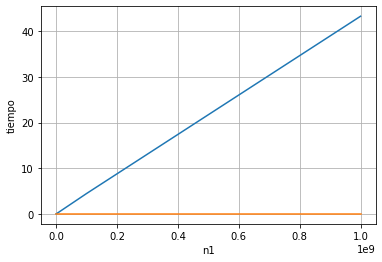

In [74]:
plt.plot(n1, time_sum1)
plt.plot(n1, time_sum2)
plt.xlabel("n1")
plt.ylabel("tiempo")
plt.grid()
plt.show()

4. Analytically estime the runtime functions for the functions `sum1` and `sum2`. Call them $T_1(n)$ and $T_2(n)$.
    - Note that the times obtained in your computer will be different to the ones shown in class since the speed and memory of the computers used to run the code are likely different

The time has been changed to microseconds to make it much more readable.

Using the lineal equation formula $T(n) = a * n + b$ we obtain the following equation

$T_1(n) = 0.0441 \cdot n$

$T_2(n) = c$

5. How long will it take to run the code for $n = 10^{100}$ using `sum1` and `sum2`? What are your main impressions about the difference?

**Hint:** Use and modify the code from the slides to get and plot the runtime

In [101]:
time_t1 = []
time_t2 = []
for i in range(0,110,10):
    result = 0.0441*(10**i)
    time_t1.append(result)


print("Seconds that could take using sum1: ",time_t1[10]/1000000)


Seconds that could take using sum1:  4.4100000000000005e+92


In the case of ``sum2`` the value is going to be constant, so the algorithm could process the value at an n time(depends on the computer)

### 5. Prove that the running time of an algorithm is $\Theta(g(n))$ if and only if its worst-case running time is $O(g(n))$ and its best-case running time is $\Omega(g(n))$

<img src="2.png">

### 6.  Sort the following functions in decreasing order of asymptotic complexity ($O(f(n))$):

- $f_1(n) = \sqrt{n}$
- $f_2(n) = n^3$
- $f_3(n) = {n\choose 4}$
- $f_4(n) = \sum_{i=2}^n (i-1)$

1st = $f_2(n) = n^3$

2nd = $f_4(n) = \sum_{i=2}^n (i-1)$

3th = $f_3(n) = {n\choose 4}$

4th = $f_1(n) = \sqrt{n}$

### 7. Implement the methods of the class `Array` that deal with deletion of elements. Consider the 3 cases we considered in class.

In [10]:
import ctypes

class Array(object):
    """
    Implementation of the array data structure
    """
    def __init__(self, n, values=None):
        self.l = 0
        self.n = n
        self.array = self._create_array(self.n)
        if values:
            self.initialize_array(values)
    
    def _create_array(self, n):
        """
        Creates a new array of capacity n
        """
        return (n * ctypes.py_object)()

    def initialize_array(self, values):
        """
        Initialize array
        """
        if self.n != len(values):
            raise ValueError("element count different than capacity")
        for item in values:
            self.array[self.l] = item
            self.l += 1
            
    def list_array(self):
        """
        List elements of the array
        using list comprehension
        """
        return ", ".join(str(x) if x is not None else '_' for x in self)

    def list_array2(self):    
        y = []    
        for x in self:
            if x is not None:
                y.append(str(x))
            else:
                y.append('_')
        return ", ".join(y)
    
    def __getitem__(self, item_index):
        """
        Return element at item_index
        """
        if (item_index < 0) or (item_index >= self.n):
            raise IndexError('index out of range!')
        try:
            x = self.array[item_index]
        except ValueError:
            x = None
        return x
    
    def __setitem__(self, item_index, item):
        """
        Set element at item_index
        """
        if (item_index < 0) or (item_index >= self.n):
            raise IndexError('index out of range!')
        self.array[item_index] = item
    
    def insert_to_tail(self, item):
        """
        Add new item to the tail of the array
        """
        if self.l == self.n:
            raise ValueError("no more capacity")
        self.array[self.l] = item
        self.l += 1

    def insert_to_head(self, item):
        """
        Add new item to the beginning of the array
        """
        if self.l == self.n:
            raise ValueError("no more capacity")
        i = self.l
        while (i > 0):
            self.array[i] = self.array[i-1]
            i -= 1
        self.array[0] = item
        self.l += 1
    
    def insert(self, index, element):
        """
        implementation of insert
        """
        if self.l == self.n:
            raise ValueError("no more capacity")
        if (index < 0) or (index > self.l):
            raise IndexError('index out of range!')
        x = self.l
        while x > index:
            self.array[x] = self.array[x-1]
            x -= 1
        self.array[index] = element
        self.l += 1

    def delete(self, index):
        """
        implementation of delete
        """
        if index >= self.n:
            raise ValueError("Not in array")

        x = self.n - 1
        while index < x:
            self.array[index] = self.array[index+1] #Find the requested value, delete it, and from that position move all elements 1 position back
            index += 1
        
        self.array[x] = "_"
        self.l -= 1 

    def delete_head(self):
        """
        implementation of delete head
        """
        x = self.n - 1
        i = 0
        while i < x:
            self.array[i] = self.array[i+1] #Find the first value in the array and move all elements back 1 position
            i += 1
        self.array[x] = "_"
        self.l -= 1

    def delete_tail(self):
        """
        implementation of delete tail
        """
        self.array[self.l-1] = "_" #Search for the last value in the array
        self.l -= 1


In [11]:
x = Array(8, [34, 21, 67, 89, 45, 17, 52, 95])
print(x.list_array())

34, 21, 67, 89, 45, 17, 52, 95


In [12]:
x.delete(2)
print(x.list_array())

34, 21, 89, 45, 17, 52, 95, _


In [13]:
x.delete_head()
print(x.list_array())

21, 89, 45, 17, 52, 95, _, _


In [14]:
x.delete_tail()
print(x.list_array())

21, 89, 45, 17, 52, _, _, _
